In [1]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [2]:
import pandas as pd
nba = pd.read_csv("nba_all_elo.csv")
type(nba)


pandas.core.frame.DataFrame

In [4]:
len(nba)
nba.shape
nba.head()
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


In [6]:
#Q1
nba.head(3)



,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN


In [7]:
 nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
gameorder        126314 non-null int64
game_id          126314 non-null object
lg_id            126314 non-null object
_iscopy          126314 non-null int64
year_id          126314 non-null int64
date_game        126314 non-null object
seasongame       126314 non-null int64
is_playoffs      126314 non-null int64
team_id          126314 non-null object
fran_id          126314 non-null object
pts              126314 non-null int64
elo_i            126314 non-null float64
elo_n            126314 non-null float64
win_equiv        126314 non-null float64
opp_id           126314 non-null object
opp_fran         126314 non-null object
opp_pts          126314 non-null int64
opp_elo_i        126314 non-null float64
opp_elo_n        126314 non-null float64
game_location    126314 non-null object
game_result      126314 non-null object
forecast         126314 non-null float64
notes     

In [8]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [9]:
 import numpy as np
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,200212160MEM,NBA,4/16/2014,BOS,Lakers,BOS,Lakers,H,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


In [11]:
nba["team_id"].value_counts()
print("Fran ID:")
nba["fran_id"].value_counts()

Fran ID:


Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Denver       

In [12]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [13]:
nba.loc[nba["team_id"] == "MNL", "date_game"].min()
nba.loc[nba["team_id"] == "MNL", "date_game"].max()
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max"))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [20]:
#Q3
nba.loc[nba["team_id"] == "MNL", "pts"].sum()


88229

In [31]:
nba.loc[nba["team_id"] == "MNL", "game_result"].count()


946

In [32]:
#Q4
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

In [33]:
city_data.loc["Amsterdam"]

NameError: name 'city_data' is not defined

In [35]:
#Q6.1
nba.iloc[-4]

gameorder               63156
game_id          201506140GSW
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/14/2015
seasongame                102
is_playoffs                 1
team_id                   GSW
fran_id              Warriors
pts                       104
elo_i                 1.8e+03
elo_n                 1.8e+03
win_equiv                  68
opp_id                    CLE
opp_fran            Cavaliers
opp_pts                    91
opp_elo_i             1.7e+03
opp_elo_n             1.7e+03
game_location               H
game_result                 W
forecast                 0.77
notes                     NaN
Name: 126310, dtype: object

In [36]:
#Q6.2
nba.iloc[2]

gameorder                   2
game_id          194611020CHS
lg_id                     NBA
_iscopy                     0
year_id                  1947
date_game           11/2/1946
seasongame                  1
is_playoffs                 0
team_id                   CHS
fran_id                 Stags
pts                        63
elo_i                 1.3e+03
elo_n                 1.3e+03
win_equiv                  42
opp_id                    NYK
opp_fran               Knicks
opp_pts                    47
opp_elo_i             1.3e+03
opp_elo_n             1.3e+03
game_location               H
game_result                 W
forecast                 0.63
notes                     NaN
Name: 2, dtype: object

In [34]:
#Q6.3
nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


In [38]:
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape

(12658, 23)

In [42]:
#Q7
df = nba[nba["year_id"].between(2000, 2010)]
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
85222,42612,199911020CHH,NBA,0,2000,11/2/1999,1,0,CHH,Pelicans,100,1547.16,1555.44,46.87,ORL,Magic,86,1539.53,1531.24,H,W,0.65,NaN
85223,42612,199911020CHH,NBA,1,2000,11/2/1999,1,0,ORL,Magic,86,1539.53,1531.24,44.36,CHH,Pelicans,100,1547.16,1555.44,A,L,0.35,NaN
85224,42613,199911020DAL,NBA,1,2000,11/2/1999,1,0,GSW,Warriors,96,1432.48,1425.06,33.32,DAL,Mavericks,108,1442.51,1449.93,A,L,0.35,NaN
85225,42613,199911020DAL,NBA,0,2000,11/2/1999,1,0,DAL,Mavericks,108,1442.51,1449.93,35.87,GSW,Warriors,96,1432.48,1425.06,H,W,0.65,NaN
85226,42614,199911020DEN,NBA,1,2000,11/2/1999,1,0,PHO,Suns,102,1540.82,1530.94,44.33,DEN,Nuggets,107,1337.71,1347.59,A,L,0.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113651,56826,201006130BOS,NBA,0,2010,6/13/2010,104,1,BOS,Celtics,92,1675.29,1680.67,58.45,LAL,Lakers,86,1684.98,1679.60,H,W,0.63,NaN
113652,56827,201006150LAL,NBA,1,2010,6/15/2010,105,1,BOS,Celtics,67,1680.67,1668.94,57.43,LAL,Lakers,89,1679.60,1691.32,A,L,0.36,NaN
113653,56827,201006150LAL,NBA,0,2010,6/15/2010,104,1,LAL,Lakers,89,1679.60,1691.32,59.35,BOS,Celtics,67,1680.67,1668.94,H,W,0.64,NaN
113654,56828,201006170LAL,NBA,0,2010,6/17/2010,105,1,LAL,Lakers,83,1691.32,1695.14,59.67,BOS,Celtics,79,1668.94,1665.13,H,W,0.67,NaN


In [43]:
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

(5424, 23)

In [44]:
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

(27797, 23)

In [46]:
nba[(nba["_iscopy"] == 0) & (nba["pts"] > 100) & (nba["opp_pts"] > 100) & (nba["team_id"] == "BLB")]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


In [50]:
#Q8
nba[
    (nba["_iscopy"] == 0) &
     (nba["is_playoffs"] == 1)&
    (nba["pts"] > 100)&
    (nba["opp_pts"] > 100)&
    (nba["year_id"]==2011)
    
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
116128,58065,201104170OKC,NBA,0,2011,4/17/2011,83,1,OKC,Thunder,107,1663.08,1666.80,57.19,DEN,Nuggets,103,1635.58,1631.86,H,W,0.68,NaN
116178,58090,201104250DEN,NBA,0,2011,4/25/2011,86,1,DEN,Nuggets,104,1616.91,1621.80,53.04,OKC,Thunder,101,1681.75,1676.86,H,W,0.55,NaN
116193,58097,201104270SAS,NBA,0,2011,4/27/2011,87,1,SAS,Spurs,110,1613.34,1618.78,52.75,MEM,Grizzlies,103,1606.29,1600.85,H,W,0.65,NaN
116205,58103,201105010OKC,NBA,0,2011,5/1/2011,88,1,OKC,Thunder,101,1679.75,1659.01,56.50,MEM,Grizzlies,114,1607.40,1628.13,H,L,0.73,NaN
116213,58107,201105030OKC,NBA,0,2011,5/3/2011,89,1,OKC,Thunder,111,1659.01,1664.65,57.00,MEM,Grizzlies,102,1628.13,1622.49,H,W,0.68,NaN
116233,58117,201105090MEM,NBA,0,2011,5/9/2011,92,1,MEM,Grizzlies,123,1629.74,1616.46,52.53,OKC,Thunder,133,1657.41,1670.68,H,L,0.60,NaN
116248,58125,201105170DAL,NBA,0,2011,5/17/2011,93,1,DAL,Mavericks,121,1698.00,1703.92,60.35,OKC,Thunder,112,1677.60,1671.68,H,W,0.67,NaN
116258,58130,201105230OKC,NBA,0,2011,5/23/2011,98,1,OKC,Thunder,105,1672.98,1662.28,56.79,DAL,Mavericks,112,1702.62,1713.31,H,L,0.60,NaN
116275,58138,201106090DAL,NBA,0,2011,6/9/2011,102,1,DAL,Mavericks,112,1715.05,1721.75,61.77,MIA,Heat,103,1722.42,1715.72,H,W,0.63,NaN


In [54]:
nba.groupby("fran_id", sort=False)["pts"].sum()
nba[(nba["fran_id"] == "Spurs") & (nba["year_id"] > 2010)].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [53]:
#Q9
nba[(nba["fran_id"] == "Knicks") & (nba["year_id"] == 2012)].groupby(["year_id", "game_result"])["game_result"].count()

year_id  game_result
2012     L              34
         W              37
Name: game_result, dtype: int64

In [55]:
df = nba.copy()
df.shape

(126314, 23)

In [56]:
df["difference"] = df.pts - df.opp_pts
df.shape

(126314, 24)

In [57]:
df["difference"].max()


68

In [58]:
renamed_df = df.rename(
    columns={"game_result": "result", "game_location": "location"}
)
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
gameorder      126314 non-null int64
game_id        126314 non-null object
lg_id          126314 non-null object
_iscopy        126314 non-null int64
year_id        126314 non-null int64
date_game      126314 non-null object
seasongame     126314 non-null int64
is_playoffs    126314 non-null int64
team_id        126314 non-null object
fran_id        126314 non-null object
pts            126314 non-null int64
elo_i          126314 non-null float64
elo_n          126314 non-null float64
win_equiv      126314 non-null float64
opp_id         126314 non-null object
opp_fran       126314 non-null object
opp_pts        126314 non-null int64
opp_elo_i      126314 non-null float64
opp_elo_n      126314 non-null float64
location       126314 non-null object
result         126314 non-null object
forecast       126314 non-null float64
notes          5424 non-null object
difference     126

In [59]:
df.shape

elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
df.shape

(126314, 20)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
gameorder        126314 non-null int64
game_id          126314 non-null object
lg_id            126314 non-null object
_iscopy          126314 non-null int64
year_id          126314 non-null int64
date_game        126314 non-null object
seasongame       126314 non-null int64
is_playoffs      126314 non-null int64
team_id          126314 non-null object
fran_id          126314 non-null object
pts              126314 non-null int64
win_equiv        126314 non-null float64
opp_id           126314 non-null object
opp_fran         126314 non-null object
opp_pts          126314 non-null int64
game_location    126314 non-null object
game_result      126314 non-null object
forecast         126314 non-null float64
notes            5424 non-null object
difference       126314 non-null int64
dtypes: float64(2), int64(8), object(10)
memory usage: 19.3+ MB


In [61]:
df["date_game"] = pd.to_datetime(df["date_game"])

In [62]:
df["game_location"].nunique()

df["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [63]:
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [65]:
#Q10
df["game_result"].nunique()

df["game_result"].value_counts()



W    63157
L    63157
Name: game_result, dtype: int64

In [66]:
df["game_result"] = pd.Categorical(df["game_result"])

In [67]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 23)

In [68]:
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

(126314, 22)

In [69]:
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(
    value="no notes at all",
    inplace=True
)
data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

In [70]:
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR


In [71]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

True

In [72]:
 %matplotlib inline

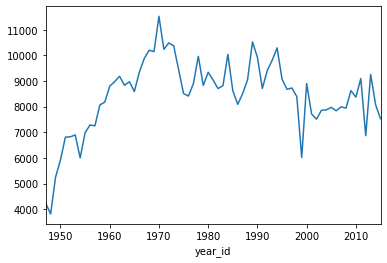

In [73]:
 nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

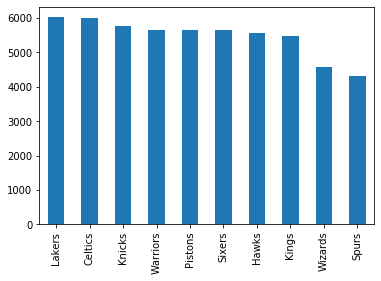

In [74]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

In [ ]:
miami = nba[(nba['team_id'] == 'MIA') & (nba['year_id' == 2013])]

miami['game_result'].value_counts().plot(kind='pie')